# Asset Pricing Model

## Homework 5

#### 20121229 Jun Pyo Park

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd

## Graph Generating Function

In [49]:
# Function get_random_plot : making one sample graph for input parameters
def get_random_plot(S_0, mu, sigma, dt, time_line):
    s = []
    s.append(S_0)
    k = len(time_line)
    for i in range(1,k):
        s.append(s[i-1] * np.exp( (mu-0.5 * sigma ** 2) * dt + sigma * dt ** 0.5 * np.random.randn()))
    return pd.Series(s, index = time_line)

In [123]:
# Setting the Parameters
S_0 = 10
mu = 0.08
sigma = 0.3
T_0 = 0 # starting time point
T = 1 # End of time point
L = 1000 # number of time_step interval
time_line = np.linspace(T_0,T,L)
dt = (T - T_0) / L # unit size of time_step interval

In [124]:
iter_num = 20 # number of iteration = number of sample graphs

## Plot sample graphs

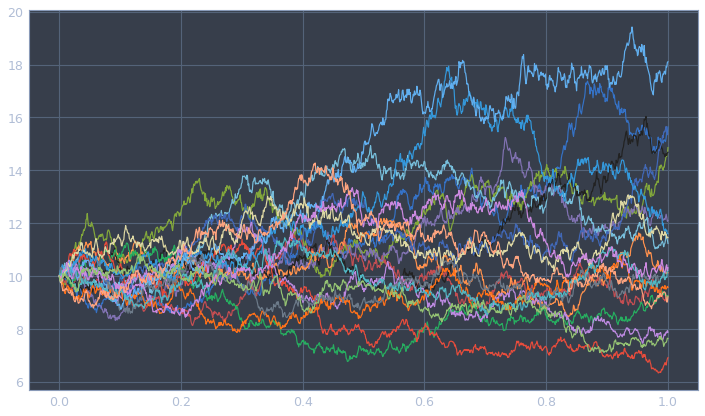

In [125]:
sample_table = pd.DataFrame()
plt.figure(figsize=(12,7))
for j in range(iter_num):
    sample_graph = get_random_plot(S_0, mu, sigma, dt, time_line)
    sample_table['graph' + str(j+1)] = sample_graph
    fig = plt.plot(sample_graph)
plt.show()

In [126]:
# show the 5 sample graph in order
sample_table.T.head(5)

,0.0,0.001001001001001001,0.002002002002002002,0.003003003003003003,0.004004004004004004,0.005005005005005005,0.006006006006006006,0.007007007007007007,0.008008008008008008,0.009009009009009009,...,0.990990990990991,0.991991991991992,0.992992992992993,0.993993993993994,0.994994994994995,0.995995995995996,0.996996996996997,0.997997997997998,0.998998998998999,1.0
graph1,10.0,9.978221,9.863379,9.908876,10.028005,10.158886,10.065763,9.990039,10.006786,9.943059,...,15.110446,15.031301,15.137890,15.155989,15.114822,15.084612,15.228896,15.505305,15.384054,15.639863
graph2,10.0,9.955820,10.032912,9.940792,9.819875,9.801665,9.678602,9.734069,9.716799,9.697675,...,14.057879,14.006846,14.122014,14.123681,14.307250,14.395777,14.580916,14.530780,14.620496,14.862111
graph3,10.0,9.996599,10.024900,9.975165,9.998866,9.905883,9.834203,9.869337,9.755773,9.775407,...,9.237383,9.146112,9.119762,9.110082,9.061857,9.131375,9.207055,9.164282,9.189097,9.180812
graph4,10.0,9.916014,9.975392,10.026069,10.058218,10.042042,10.122679,10.164675,10.177993,10.216468,...,12.168888,12.109524,12.145704,12.177092,12.135776,12.221621,12.340011,12.222738,12.072156,12.100620
graph5,10.0,10.106293,9.900212,9.939890,10.040420,9.950761,10.003091,10.095074,9.986017,10.109050,...,10.182066,10.163249,10.104001,10.129443,10.140189,10.202490,10.086872,10.137894,10.158685,10.124871


## Calculating Average and Theoritical Value

In [127]:
# Calculating Average graph of all samples
sample_table['Average'] = sample_table.mean(axis=1)

# Calculating theoritical value(graph)
sample_table['Theoritic'] = list(map(lambda x : S_0 * np.exp(mu*x), sample_table.index))

# Print both graph
sample_table[['Average','Theoritic']].T

,0.0,0.001001001001001001,0.002002002002002002,0.003003003003003003,0.004004004004004004,0.005005005005005005,0.006006006006006006,0.007007007007007007,0.008008008008008008,0.009009009009009009,...,0.990990990990991,0.991991991991992,0.992992992992993,0.993993993993994,0.994994994994995,0.995995995995996,0.996996996996997,0.997997997997998,0.998998998998999,1.0
Average,10.0,9.989660,9.993832,9.999208,10.029152,10.025409,10.053145,10.052838,10.034101,10.052709,...,11.186466,11.152819,11.159635,11.173641,11.177620,11.204094,11.254492,11.238896,11.239918,11.284633
Theoritic,10.0,10.000801,10.001602,10.002403,10.003204,10.004005,10.004806,10.005607,10.006408,10.007210,...,10.825066,10.825933,10.826800,10.827667,10.828534,10.829401,10.830268,10.831136,10.832003,10.832871


## Plot the Expectation Value of S(t) & Theoritic Value

<img src="https://trello-attachments.s3.amazonaws.com/59103d52b56a24582f00dc97/5ac762e9dae6276edda50d5e/bfbf5c4ffc2f8625abf64e4a736271e4/image.png"></img>

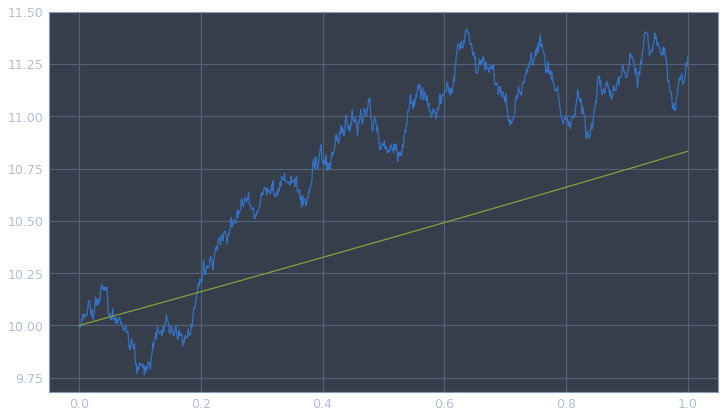

In [128]:
# Plot two graphs
plt.figure(figsize=(12,7))
fig = plt.plot(sample_table[['Average','Theoritic']])
plt.show()

Here I generated only 20 samples(too little samples to expect the smoothing effect), so there are huge difference between theoritic and average values.

## Check the Sum-of-Square Returns for each graphs

<img src="https://trello-attachments.s3.amazonaws.com/59103d52b56a24582f00dc97/5ac764e5f53fe1654c3ae473/4af4ecc5cd7b6374c7e047e318e6974d/image.png"></img>

Now we check the 'Sum-of-Square Return' for each samples. <br>
First, calculate the daily return table.

In [129]:
return_table = sample_table.pct_change(axis=0)
return_table.T.head(5) # It shows the 5 sample graph's daily return(Here, pct_change means daily return)

,0.0,0.001001001001001001,0.002002002002002002,0.003003003003003003,0.004004004004004004,0.005005005005005005,0.006006006006006006,0.007007007007007007,0.008008008008008008,0.009009009009009009,...,0.990990990990991,0.991991991991992,0.992992992992993,0.993993993993994,0.994994994994995,0.995995995995996,0.996996996996997,0.997997997997998,0.998998998998999,1.0
graph1,NaN,-0.002178,-0.011509,0.004613,0.012022,0.013052,-0.009167,-0.007523,0.001676,-0.006368,...,0.000403,-0.005238,0.007091,0.001196,-0.002716,-0.001999,0.009565,0.018150,-0.007820,0.016628
graph2,NaN,-0.004418,0.007743,-0.009182,-0.012164,-0.001854,-0.012555,0.005731,-0.001774,-0.001968,...,-0.004625,-0.003630,0.008222,0.000118,0.012997,0.006188,0.012861,-0.003438,0.006174,0.016526
graph3,NaN,-0.000340,0.002831,-0.004961,0.002376,-0.009299,-0.007236,0.003573,-0.011507,0.002013,...,-0.003982,-0.009881,-0.002881,-0.001061,-0.005294,0.007671,0.008288,-0.004646,0.002708,-0.000902
graph4,NaN,-0.008399,0.005988,0.005080,0.003207,-0.001608,0.008030,0.004149,0.001310,0.003780,...,-0.009410,-0.004878,0.002988,0.002584,-0.003393,0.007074,0.009687,-0.009503,-0.012320,0.002358
graph5,NaN,0.010629,-0.020391,0.004008,0.010114,-0.008930,0.005259,0.009195,-0.010803,0.012321,...,-0.015694,-0.001848,-0.005830,0.002518,0.001061,0.006144,-0.011332,0.005058,0.002051,-0.003329


Then, calculate the sum of square return for each graph

In [130]:
sum_of_squared_return = (return_table ** 2).sum(axis=0)[:-2]
sum_of_squared_return.head(5) # Shows 5 sample graph's sum-of-square return

graph1    0.084654
graph2    0.090812
graph3    0.083032
graph4    0.088598
graph5    0.090637
dtype: float64

## Result

In [133]:
# Calculating whole sample graph's mean and variance
mean = sum_of_squared_return.mean()
var = sum_of_squared_return.var()
print("Mean of Sum of Square Return :", mean)
print("Variance of Sum of Square Return :", var)

Mean of Sum of Square Return : 0.08789991579149439
Variance of Sum of Square Return : 1.2773025796140109e-05


In [134]:
# Calculating theoritical mean and variance
theoritic_mean = sigma ** 2 * T
theoritic_var = 0
print("Theoritical Mean of Sum of Square Return : ", theoritic_mean)
print("Theoritical Variance of Sum of Square Return : 0")

Theoritical Mean of Sum of Square Return :  0.09
Theoritical Variance of Sum of Square Return : 0


#### Calculating Error

In [137]:
print('Mean Difference : ', mean - theoritic_mean)
print('Mean Error(%) : ', (mean - theoritic_mean)/theoritic_mean)
print('Variance Difference : ', var - theoritic_var)

Mean Difference :  -0.0021000842085056037
Mean Error(%) :  -0.0233342689833956
Variance Difference :  1.2773025796140109e-05


We can show that there are very small error on the mean and variance, especially variance is almost 0.